## The Sparks Foundation
### Data Science and Business Analytics: Task #3
### Problem statement: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically


In [28]:
"""
importing required libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # to split the data as train and test data sets
from sklearn import metrics # for calculating the accuracy of the model
from sklearn.metrics import confusion_matrix # for understanding the miscalculations in class
from sklearn.tree import DecisionTreeClassifier # for training the model using Decision tree Classifier
from sklearn import tree # for visual representation of model output in a tree structure

## Data Collection

In [10]:
"""
loading iris dataset
"""
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.shape

(150, 4)

In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


## Data Visualization

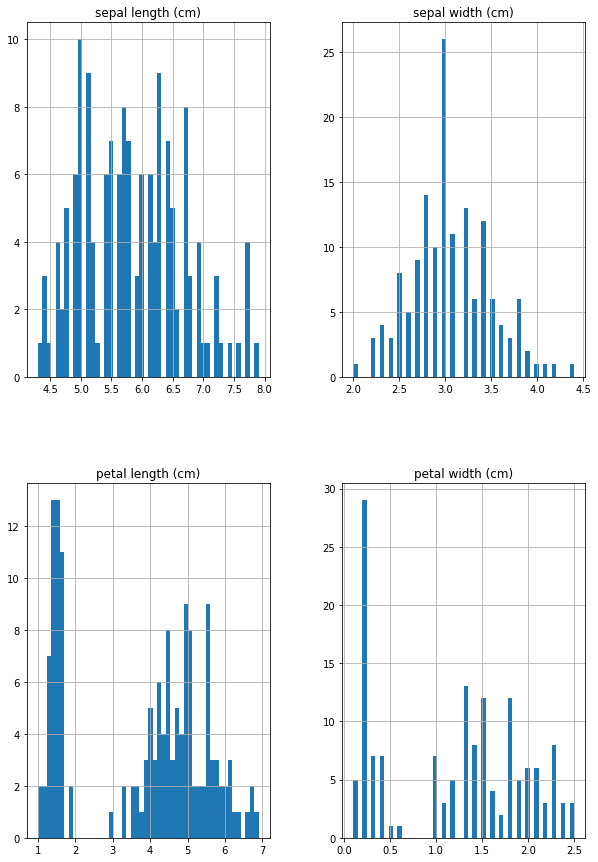

In [25]:
df.hist(bins=50,figsize=(10,15))
plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

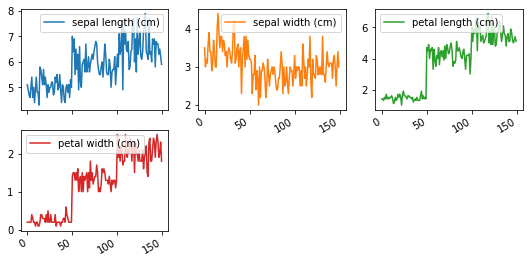

In [26]:
df.plot(kind='line',subplots=True,layout=(3,3),figsize=(9,7))

In [29]:
"""
Splitting dataset into train and test
"""
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=0,stratify=y)

# Decision Tree Classifier for training dataset

In [30]:
"""
Using decision tree classifier of sklearn for training dataset
"""
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
columns_list=list(df.columns.values)
columns_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Visualizing the decision tree of trained data

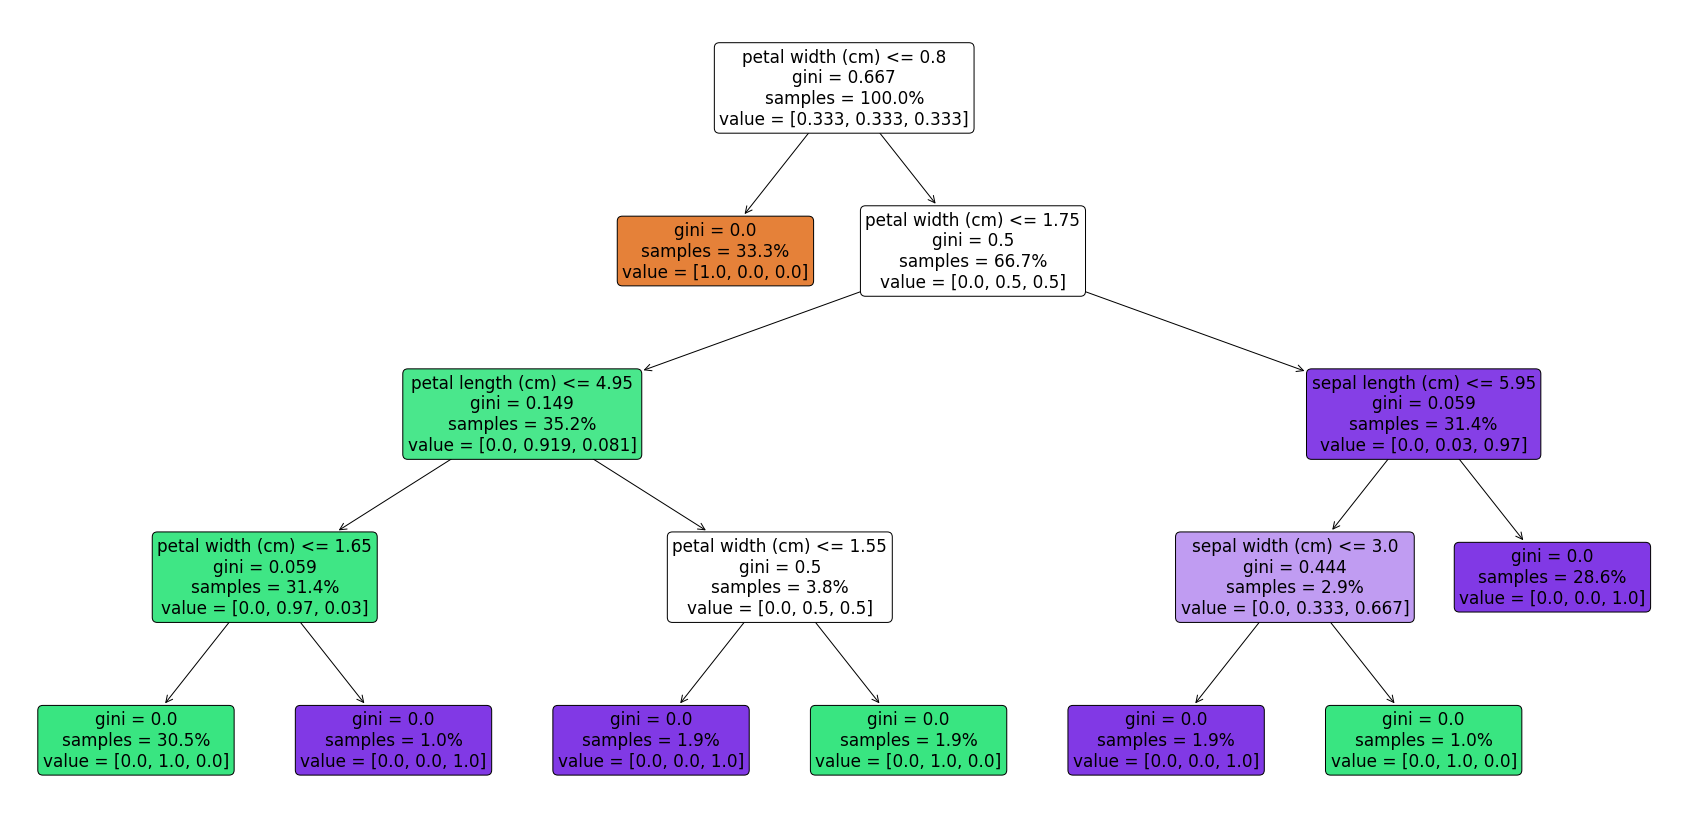

In [33]:
"""
Printing the decision tree formed using matplotlib
"""
plt.figure(figsize=(30,15))
tree.plot_tree(clf,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

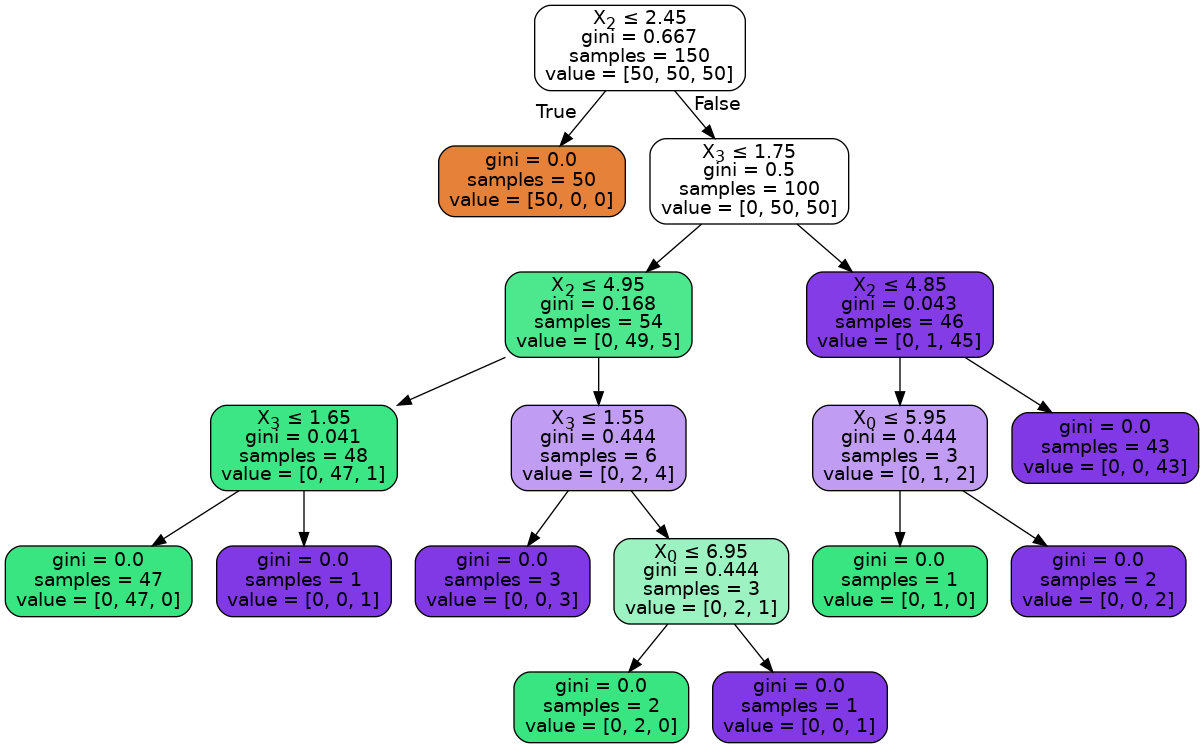

In [14]:
"""
Printing the decision tree formed using pydotplus
"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

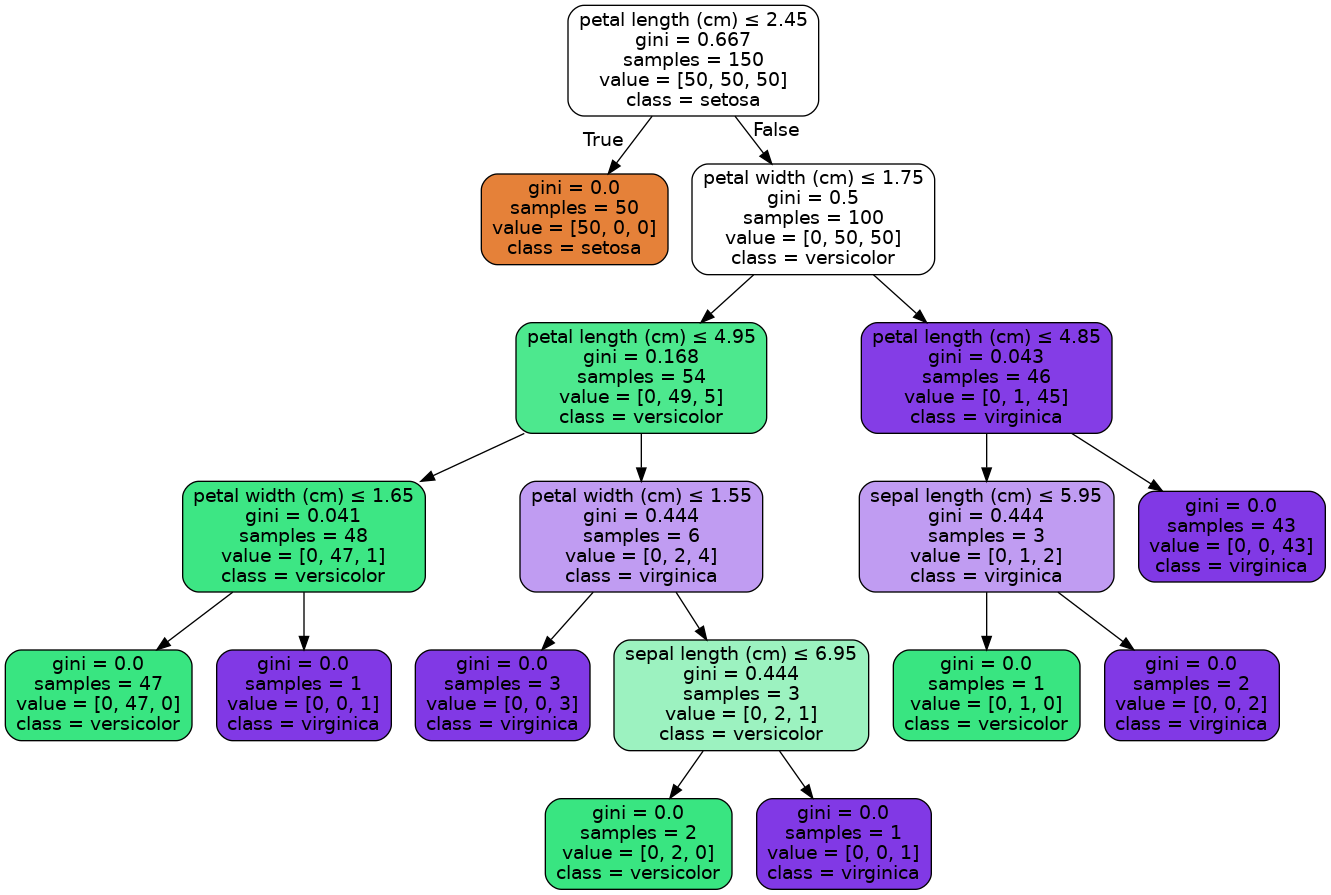

In [15]:
"""
Printing tree alongwith class names
"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = iris.feature_names, class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [34]:
"""
Making Prediction
"""
y_pred1=clf.predict(X_test)

In [53]:
"""
Accuracy of training dataset
"""
print('Accuracy for training dataset: ', clf.score(X_train,y_train))

Accuracy for training dataset:  1.0


In [52]:
"""
Accuracy of testing dataset
"""
print('Accuracy for testing dataset: ',clf.score(X_test,y_test))

Accuracy for testing dataset:  0.9777777777777777


# Decision Tree Classifier for training dataset with PRUNNING

### Prunning the tree with parameters(max_depth,max_leaf_nodes) to reduce the difference in accuracy score of test and train.

In [47]:
"""
Using decision tree classifier of sklearn for training dataset with PRUNNING
"""
clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)

## Visualizing the decision tree of training dataset with PRUNNING

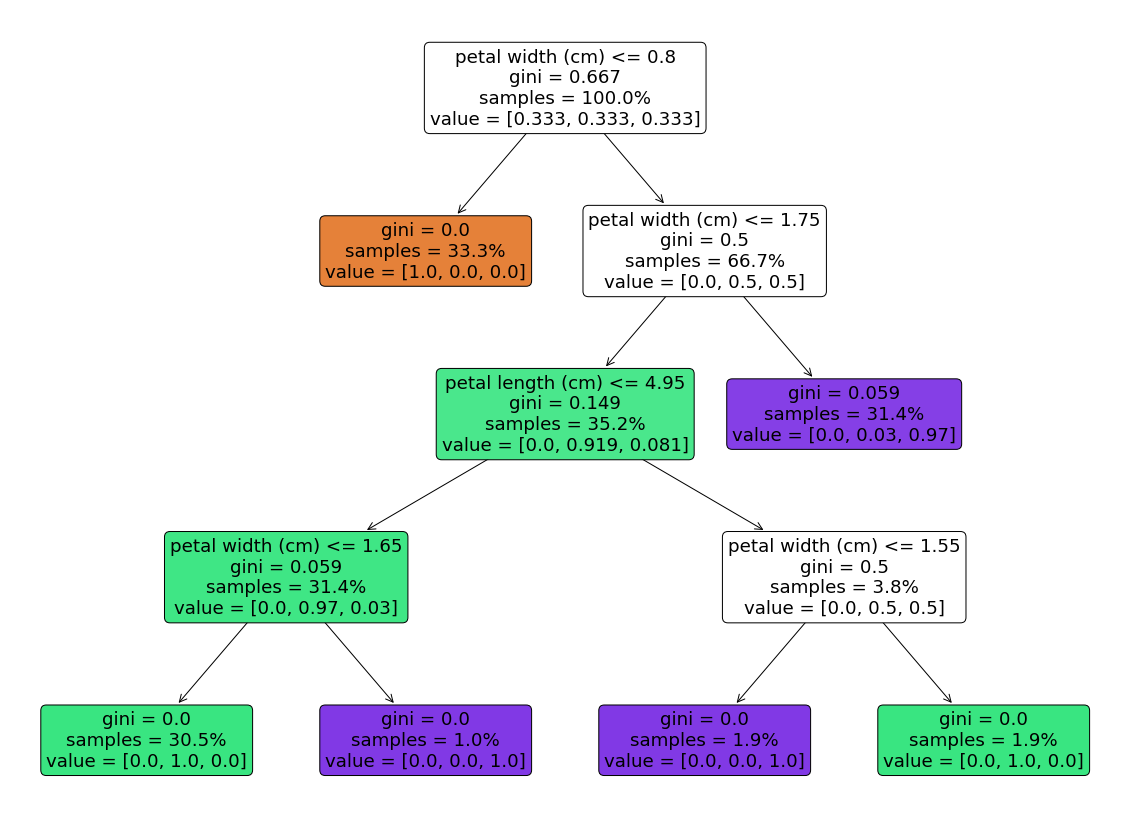

In [48]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf2,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [39]:
"""
Making Prediction
"""
y_pred2=dtree_clf2.predict(X_test)

In [54]:
"""
Accuracy of training dataset with PRUNNING
"""
print('Accuracy for training dataset: ', dtree_clf2.score(X_train,y_train))

Accuracy for training dataset:  0.9904761904761905


In [55]:
"""
Accuracy of testing dataset with PRUNNING
"""
print('Accuracy for testing dataset: ', dtree_clf2.score(X_test,y_test))

Accuracy for testing dataset:  0.9777777777777777


# Decision Tree Classifier for Complete dataset with PRUNNING

In [49]:
"""
Using decision tree classifier of sklearn for complete dataset with PRUNNING
"""
dtree_clf=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf.fit(df,y)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)

In [56]:
"""
Accuracy of iris dataset with PRUNNING
"""
print('Accuracy for complete dataset: ', dtree_clf.score(df,y))

Accuracy for complete dataset:  0.9866666666666667


## Visualizing the decision tree of iris dataset with PRUNNING

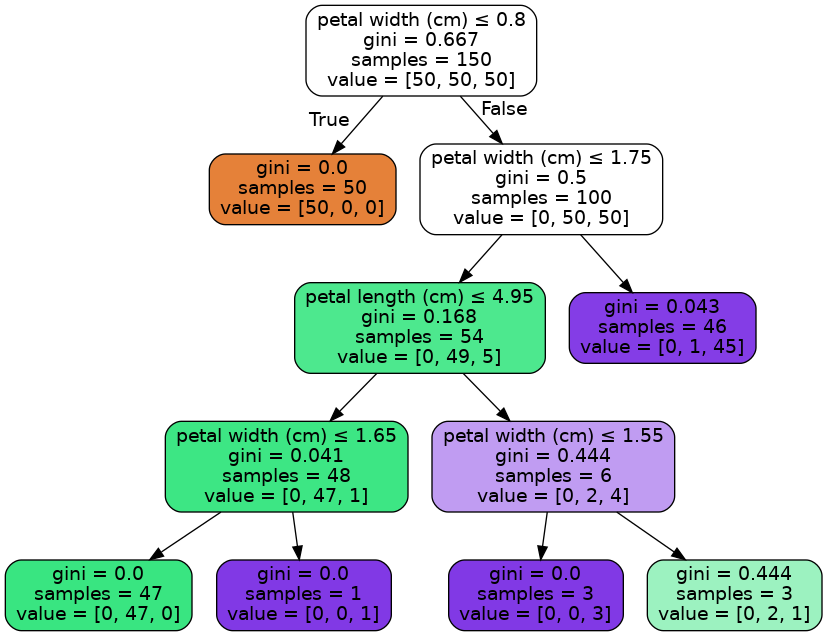

In [44]:
"""
Visualization of iris dataset with PRUNNING without class names
"""
dot_data = StringIO()
tree.export_graphviz(dtree_clf, out_file=dot_data, feature_names=columns_list,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

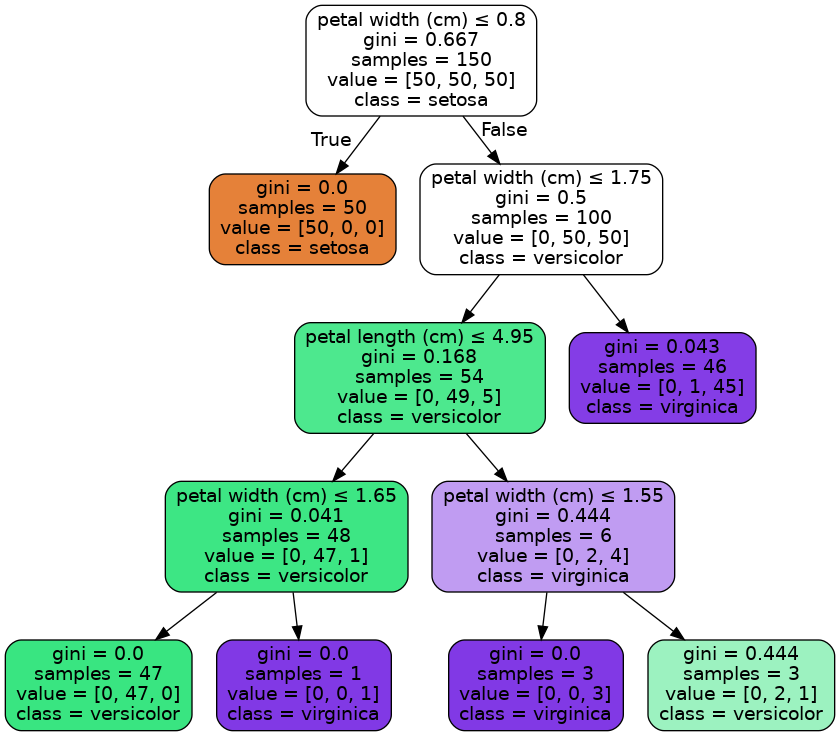

In [45]:
"""
Visualization of iris dataset with PRUNNING with class names
"""
dot_data = StringIO()
tree.export_graphviz(dtree_clf, out_file=dot_data, feature_names=columns_list,  
                filled=True, rounded=True,
                special_characters=True, class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())